# Store Sales Time Series Forecasting
<p>The main mission with this notebook is around predicting sales for each product family and store combination. The 6 pieces of data that will be used are: (a) train, (b) test, (c) store, (d) transactions, (e) holidays and events, and (f) daily oil prices.</p>

## 1. Importing Packages
<p>Including the packages below.</p>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Importing Data
<p>Converting the files within the 'datasets' folder into DataFrames. Also making a few data type modifications.</p>

In [31]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
stores = pd.read_csv('datasets/stores.csv')
sub = pd.read_csv('datasets/sample_submission.csv')
transactions = pd.read_csv('datasets/transactions.csv')

In [32]:
train["date"] = pd.to_datetime(train["date"])
train.onpromotion = train.onpromotion.astype("float16")
train.sales = train.sales.astype("float32")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [33]:
test["date"] = pd.to_datetime(test["date"])
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [34]:
stores.cluster = stores.cluster.astype("int8")
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [35]:
transactions = transactions.sort_values(["store_nbr", "date"])
transactions["date"] = pd.to_datetime(transactions["date"])
transactions.head()

,date,store_nbr,transactions
1,2013-01-02,1,2111
47,2013-01-03,1,1833
93,2013-01-04,1,1863
139,2013-01-05,1,1509
185,2013-01-06,1,520


## 3. Transactions
<p>Starting off with transaction data... This dataset conveys how many people came to the store and how many invoices were created in a day.</p>
<p>The training data provides information around the total sales of each product family at a particular store on a given date. Fractional values are possible since products can be sold in fractional units.</p>
<p>By grouping 'date' and 'store_nbr', the transactions dataset serves as a valuable feature store during the model creation process. New features will be generated by using the transactions dataset.</p>

In [36]:
groupdf = train.groupby(["date", "store_nbr"]).sales.sum().reset_index()
stdf = pd.merge(groupdf, transactions, how="left")

# Printing out a merged dataframe. One consolidated view of sales and transactions.
stdf.tail()

,date,store_nbr,sales,transactions
90931,2017-08-15,50,16879.121094,2804.0
90932,2017-08-15,51,20154.558594,1573.0
90933,2017-08-15,52,18600.046875,2255.0
90934,2017-08-15,53,8208.189453,932.0
90935,2017-08-15,54,12666.858398,802.0


In [37]:
# How well are sales and transactions correlated?
# The Spearman correlation coefficient can help answer this question.

spCorrCoeff = stdf.corr("spearman").sales.loc["transactions"]
print("Spearman Correlation Coefficient: {:,.4f}" .format(spCorrCoeff))

Spearman Correlation Coefficient: 0.8175


No handles with labels found to put in legend.


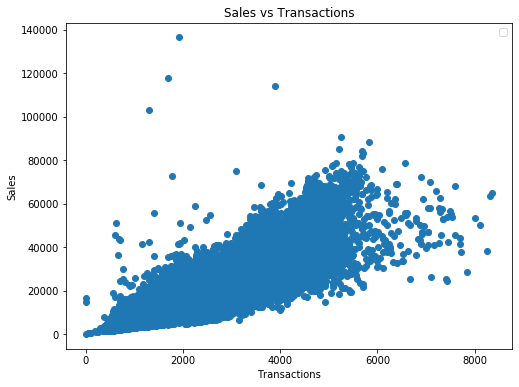

In [84]:
# Visualizing the correlation between sales and transactions.
# TODO: Add a regression line to the plot.

plt.figure(figsize=(8, 6))
plt.scatter(stdf["transactions"], stdf["sales"])
plt.title("Sales vs Transactions")
plt.xlabel("Transactions")
plt.ylabel("Sales")
plt.show()

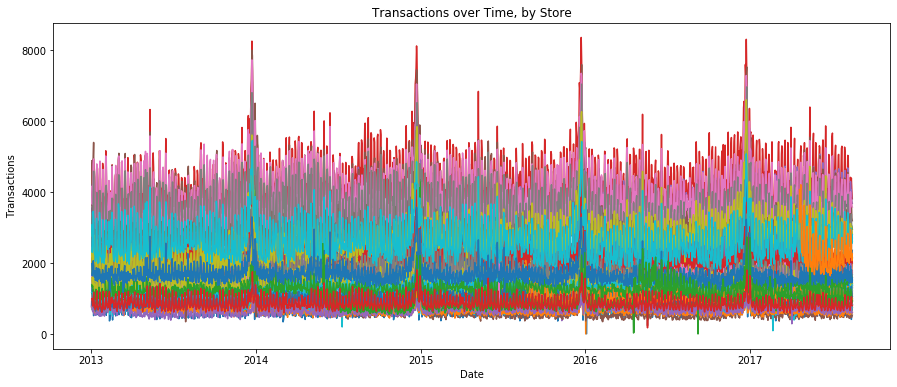

In [51]:
# Creating a neat visualization.
%matplotlib inline

# Mapping the plotting variables correctly.
transactionSort = transactions.sort_values(["store_nbr", "date"])
x = transactionSort["date"]
y = transactionSort["transactions"]

# Sizing the plot.
plt.figure(figsize=(15, 6))

# Labeling and coloring appropriately.
ts_group = transactionSort.groupby("store_nbr")
for store_nbr, data in ts_group:
    plt.plot(data["date"], data["transactions"], label=f"Store {store_nbr}")

# Adding a legend and title.
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title("Transactions over Time, by Store")
#plt.legend()
plt.show()

Text(0.5, 1.0, 'Transactions over Time, by Year')

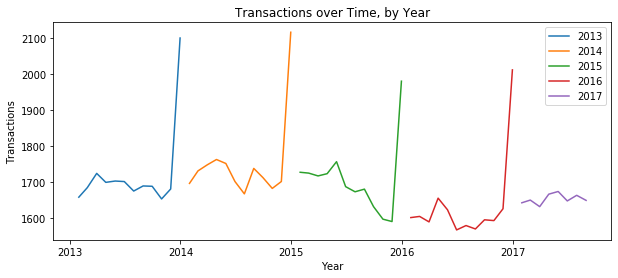

In [68]:
a = transactions.set_index("date").resample("M").transactions.mean().reset_index()
a["year"] = a.date.dt.year

# Sizing the plot.
plt.figure(figsize=(10, 4))

# Labeling and coloring appropriately.
for year, data in a.groupby("year"):
    plt.plot(data["date"], data["transactions"], label=year)

# Adding a legend and title.
plt.xlabel("Year")
plt.ylabel("Transactions")
plt.legend()
plt.title("Transactions over Time, by Year")

<p>A key takeaway from the line graphs above: the store sales increase at the end of each year.</p>